In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('TV_Final.csv')

In [3]:
df.shape

(912, 7)

In [4]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [5]:
df['Brand']=df['Brand'].replace(['Samsung'],'SAMSUNG')

In [6]:
df.dtypes

Brand                object
Resolution           object
Size                  int64
Selling Price         int64
Original Price        int64
Operating System     object
Rating              float64
dtype: object

In [7]:
df.nunique()

Brand                58
Resolution            5
Size                 27
Selling Price       515
Original Price      455
Operating System      7
Rating               25
dtype: int64

In [8]:
df['Brand'].nunique()

58

In [9]:
df['Resolution'].unique()

array(['Ultra HD LED', 'QLED Ultra HD', 'HD LED', 'Full HD LED',
       'HD Plasma'], dtype=object)

In [10]:
df['Operating System'].unique()

array(['VIDAA', 'Android', 'Linux', nan, 'Tizen', 'WebOS', 'HomeOS',
       'FireTV OS'], dtype=object)

In [11]:
df.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

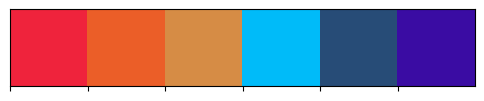

In [12]:
colors = ["#EF233C","#eb5e28","#d68c45","#00bbf9","#274c77","#3a0ca3"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

In [13]:
df['Brand'].groupby(df['Resolution']).count().sort_values(ascending=False)

Resolution
Ultra HD LED     399
HD LED           229
Full HD LED      220
QLED Ultra HD     60
HD Plasma          4
Name: Brand, dtype: int64

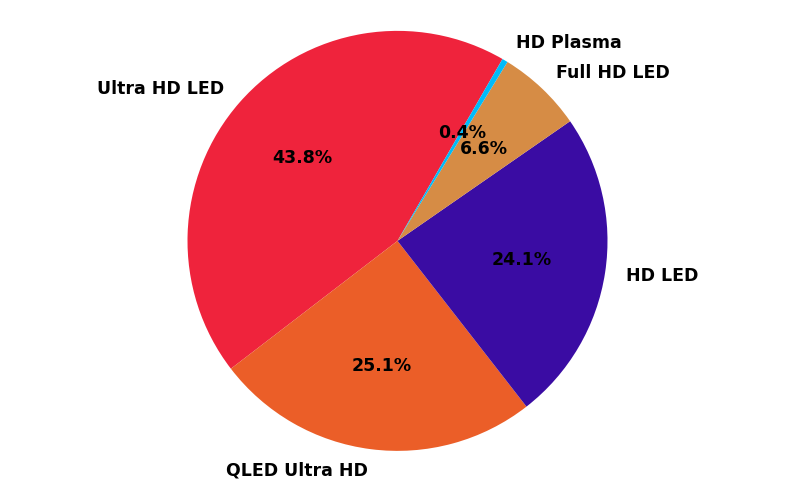

In [14]:
labels = 'Ultra HD LED', 'QLED Ultra HD', 'HD LED', 'Full HD LED','HD Plasma'
sizes = [399,229,220,60,4]
fig, ax = plt.subplots(figsize=(10,6))
fig.set_facecolor('white')
ax.pie(sizes, labels=labels, colors=["#EF233C","#eb5e28","#3a0ca3","#d68c45","#00bbf9"],autopct='%1.1f%%', startangle=60,textprops={'color':'black','weight':'bold','fontsize':12.5})
ax.axis('equal')
plt.show()

In [15]:
df['Brand'].groupby(df['Brand']).count().sort_values(ascending=False).iloc[:5]

Brand
SAMSUNG      146
LG           122
SONY          62
TCL           44
Panasonic     30
Name: Brand, dtype: int64

<Axes: xlabel='count', ylabel='Brand'>

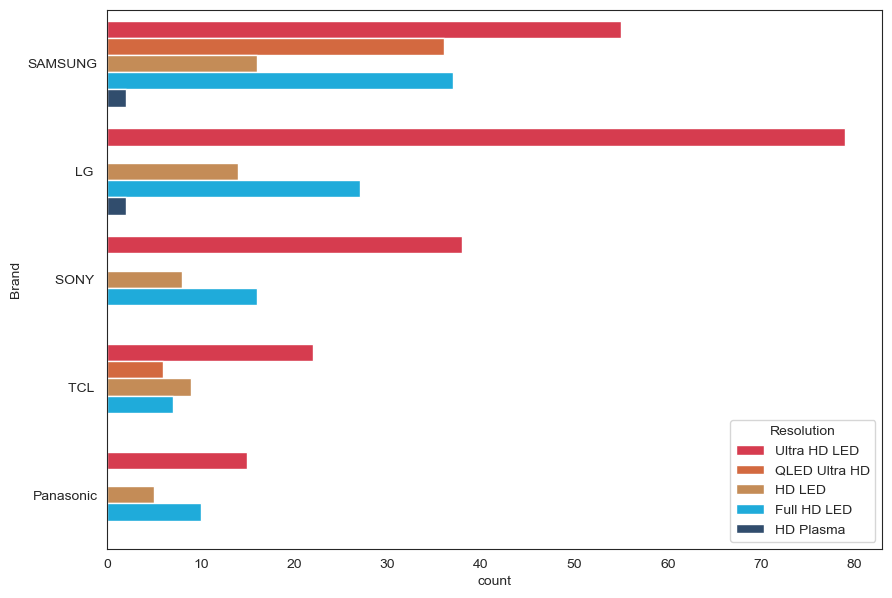

In [16]:
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(y="Brand", hue="Resolution", data=df, palette=colors,order=df["Brand"].value_counts().iloc[:5].index)

In [17]:
round(df.groupby('Brand')['Rating'].mean().sort_values(ascending=False),1)

Brand
SONY                4.5
OnePlus             4.4
Hisense             4.4
Haier               4.4
Vu                  4.4
TOSHIBA             4.4
MOTOROLA            4.3
Mi                  4.3
Compaq              4.3
Onida               4.3
Thomson             4.3
Onix                4.3
Dektron             4.3
KODAK               4.3
iFFALCON by TCL     4.3
LG                  4.3
realme              4.3
MarQ by Flipkart    4.3
Nokia               4.3
SAMSUNG             4.3
Coocaa              4.2
Blaupunkt           4.2
Weston              4.2
TCL                 4.2
Sanyo               4.2
Infinix             4.2
Intex               4.2
Panasonic           4.2
IMPEX               4.1
Croma               4.1
Sansui              4.1
Micromax            4.1
PHILIPS             4.1
HUIDI               4.1
CloudWalker         4.1
Candes              4.1
Lloyd               4.1
JVC                 4.0
DETEL               4.0
LumX                4.0
Acer                3.9
RGL       

C:\Users\Baraa Ehab\AppData\Local\Temp\ipykernel_10504\129868120.py:12: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax1 = sns.stripplot(x="Rating", y="Selling Price", data=df_f1,hue="Brand", palette=colors,ax=axs[0])
C:\Users\Baraa Ehab\AppData\Local\Temp\ipykernel_10504\129868120.py:13: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax2 = sns.stripplot(x="Rating", y="Selling Price", data=df_f2,hue="Brand", palette=colors,ax=axs[1])


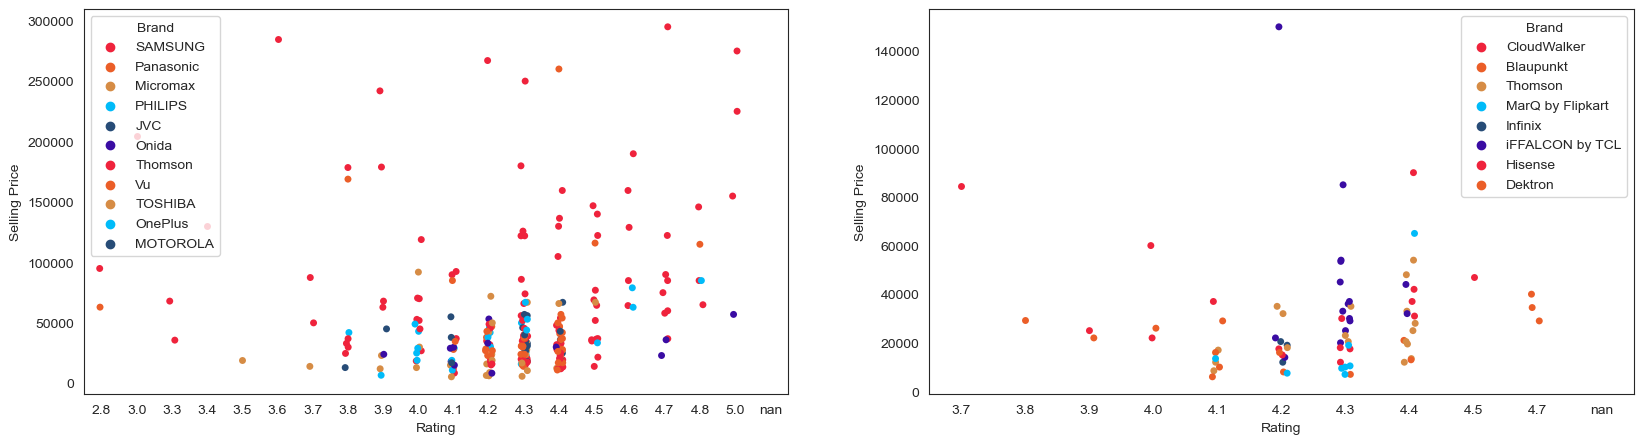

In [18]:
list1 = ["SONY","OnePlus","Haier","Vu","TOSHIBA","MOTOROLA","Mi","Compaq","Onida","Thomson",
        "KODAK","LG","realme","SAMSUNG","Nokia","Panasonic","Sansui","Micromax","PHILIPS","Samsung","JVC"]

list2 = ["Hisense","Thomson","Onix","KODAK","Dektron","iFFALCON by TCL","MarQ by Flipkart","Nokia","Coocaa","Blaupunkt","Weston","TCL",
        "Infinix","Sanyo","Intex","IMPEX","Croma","HUIDI","CloudWalker","Lloyd", 
        "Candes","Detel","LumX"]
series1 = df["Brand"].isin(list1)
series2 = df["Brand"].isin(list2)
df_f1= df[series1]
df_f2= df[series2]
fig, axs = plt.subplots(ncols=2,figsize=(20,5))
ax1 = sns.stripplot(x="Rating", y="Selling Price", data=df_f1,hue="Brand", palette=colors,ax=axs[0])
ax2 = sns.stripplot(x="Rating", y="Selling Price", data=df_f2,hue="Brand", palette=colors,ax=axs[1])

In [20]:
pip install altair vega_datasets

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for altair from https://files.pythonhosted.org/packages/46/30/2118537233fa72c1d91a81f5908a7e843a6601ccc68b76838ebc4951505f/altair-5.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for vega_datasets from https://files.pythonhosted.org/packages/e6/9f/ca52771fe972e0dcc5167fedb609940e01516066938ff2ee28b273ae4f29/vega_datasets-0.9.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/857.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/857.8 kB ? eta -:--:--
    -------------------------------------- 20.5/857.8 kB 217.9 kB/s eta 0:00:04
   - ------------------------------------- 30.7/857.8 kB 325.1 kB/s eta 0:00:03
   --- ----------------------------------- 81.9/857.8 kB 573.4 kB/s eta 0:00:02
   ---- --------------------------------- 112.6/857.8 kB 652.2 kB/s eta 0:00:02
   ------ ------------------------------- 153.6/857

In [21]:
import altair as alt
alt.Chart(df).mark_point(filled=True,size=40).encode(
    x='Original Price',
    y='Selling Price',
    color='Brand',
    tooltip=['Brand', 'Selling Price', 'Original Price']
).interactive()

alt.Chart(...)

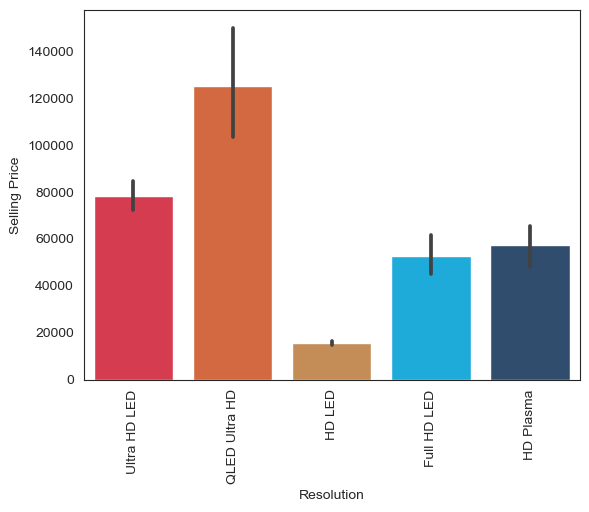

In [22]:
sns.barplot(x=df['Resolution'], y=df['Selling Price'],palette=colors)
plt.xticks(rotation="vertical")
plt.show()

In [23]:
df.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil)

Brand
Sharp               149672.0
SAMSUNG             107035.0
LG                   96915.0
Hisense              89796.0
SONY                 89343.0
TCL                  55799.0
iFFALCON by TCL      54235.0
Panasonic            53494.0
Akai                 52003.0
OnePlus              47376.0
Vu                   46650.0
Compaq               45999.0
Sanyo                45499.0
Weston               43390.0
Oxygen               40327.0
Nokia                38863.0
TOSHIBA              38853.0
MOTOROLA             38399.0
Sansui               37672.0
Haier                36617.0
AISEN                35463.0
BPL                  34618.0
Onix                 34217.0
Lloyd                34162.0
PHILIPS              34114.0
JVC                  32497.0
CloudWalker          32332.0
Acer                 31665.0
Mi                   30788.0
Power Guard          30510.0
Onida                29708.0
IMPEX                28820.0
Intex                27341.0
Micromax             26870.0
Thomson 

In [24]:
df_p1=df_f1[(df_f1["Selling Price"] >=10000) & (df_f1["Selling Price"] <= 100000)]
df_p1.iloc[:2]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
5,OnePlus,HD LED,32,15999,19999,Android,4.3


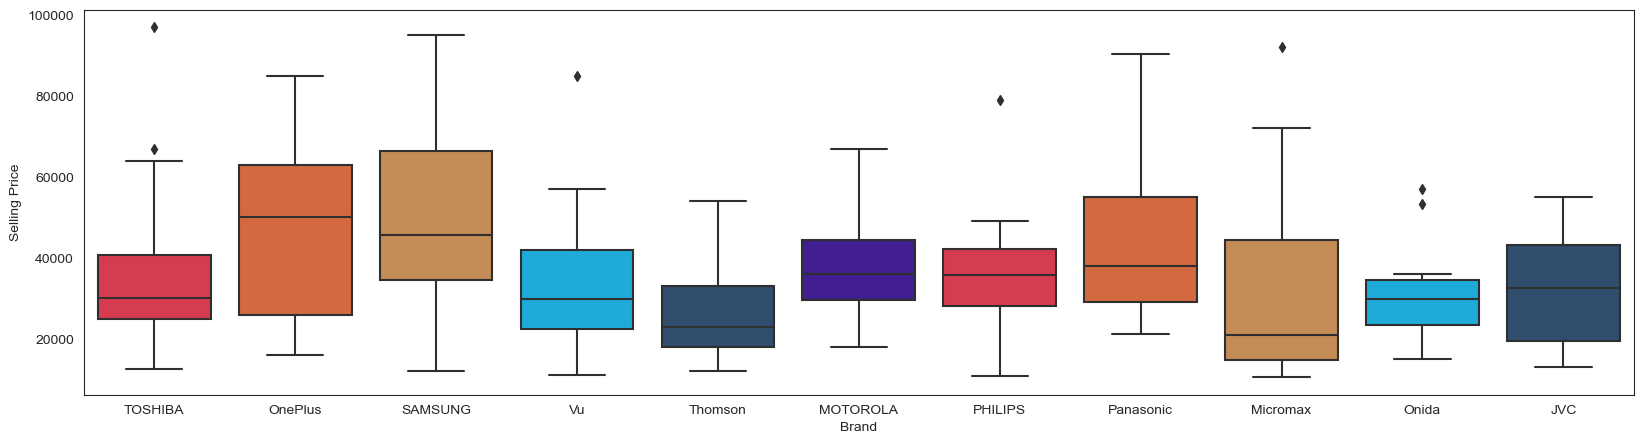

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.boxplot(x="Brand", y="Selling Price", data=df_p1,palette=colors)

In [26]:
df_p2=df_f2[(df_f2["Selling Price"] >=10000) & (df_f2["Selling Price"] <= 100000)]
df_p2.iloc[:2]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
11,Hisense,Ultra HD LED,55,36999,49990,Android,4.4
15,Hisense,Ultra HD LED,70,89999,119990,Android,4.4


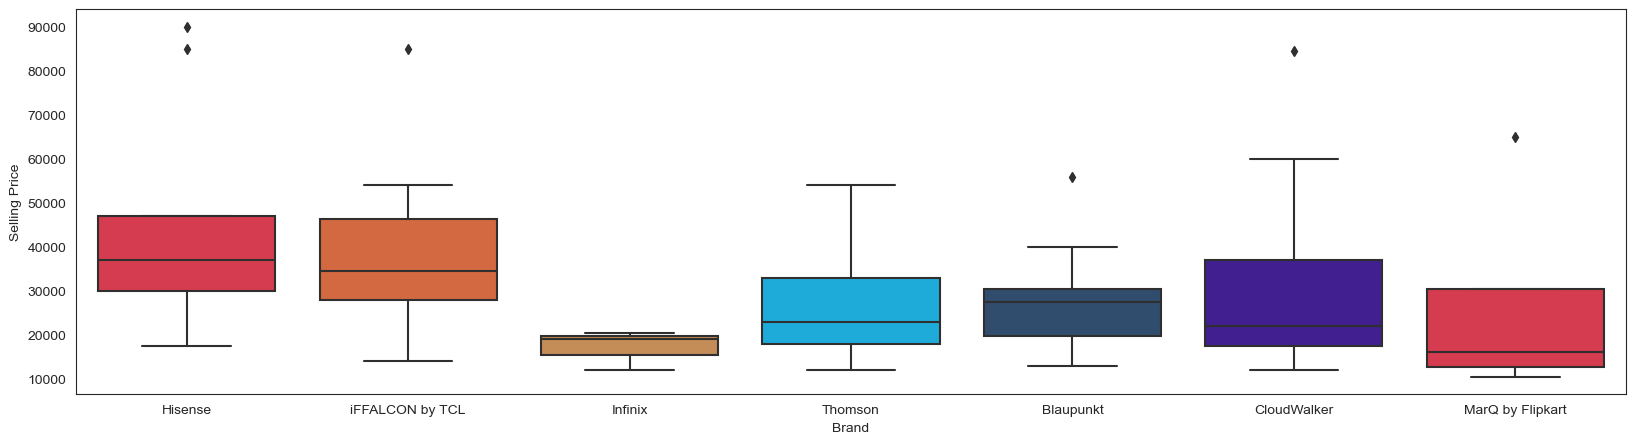

In [27]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.boxplot(x="Brand", y="Selling Price", data=df_p2,palette=colors)

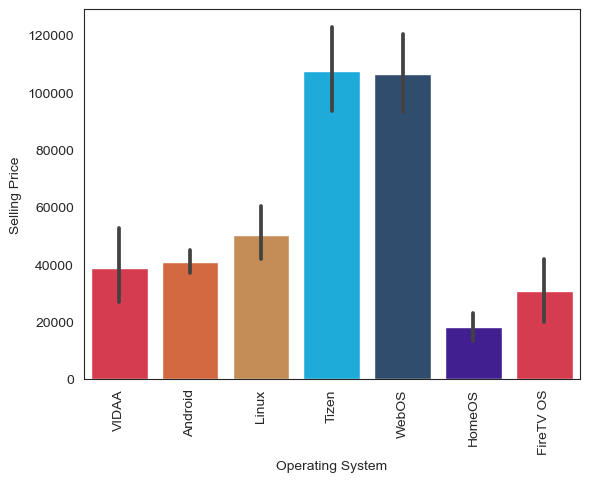

In [28]:
sns.barplot(x=df['Operating System'], y=df['Selling Price'],palette=colors)
plt.xticks(rotation="vertical")
plt.show()